---
# Segmenting and Clustering Neighborhoods in Toronto : Clustering
---

## Import librairies

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


## Import data

In [3]:
toronto_data = pd.read_csv('df_for_clustering.csv')
print(toronto_data.shape)
toronto_data.head()

(103, 6)


Unnamed: 0 Postal Code      Borough  \
0           6         M1B  Scarborough   
1          12         M1C  Scarborough   
2          18         M1E  Scarborough   
3          22         M1G  Scarborough   
4          26         M1H  Scarborough   

                             Neighborhood   Latitude  Longitude  
0                          Malvern, Rouge  43.727929 -79.262029  
1  Rouge Hill, Port Union, Highland Creek  43.794200 -79.262029  
2       Guildwood, Morningside, West Hill  43.778517 -79.346556  
3                                  Woburn  43.770120 -79.408493  
4                               Cedarbrae  43.745906 -79.352188

In [4]:
toronto_data.drop('Unnamed: 0', axis = 1, inplace = True)
toronto_data.head()

Postal Code      Borough                            Neighborhood   Latitude  \
0         M1B  Scarborough                          Malvern, Rouge  43.727929   
1         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.794200   
2         M1E  Scarborough       Guildwood, Morningside, West Hill  43.778517   
3         M1G  Scarborough                                  Woburn  43.770120   
4         M1H  Scarborough                               Cedarbrae  43.745906   

   Longitude  
0 -79.262029  
1 -79.262029  
2 -79.346556  
3 -79.408493  
4 -79.352188

## Explore Data

### Create a map of Toronto with neighborhoods superimposed on top.

#### Latitude and longitude for Toronto

In [7]:

#M5H 2N2
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [8]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Define Foursquare Credentials and Version

In [17]:
LIMIT = 100
CLIENT_ID = 'LHVDZAXMPQ34SEXN3QUVSDFHE5NUM3I2IB5APSDPWPILTSBY' # your Foursquare ID
CLIENT_SECRET = 'EJHZ5Y4JMPW1ZTSPQA1CR0E53F2C133RJK34ZZSHNQ3B0AZA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LHVDZAXMPQ34SEXN3QUVSDFHE5NUM3I2IB5APSDPWPILTSBY
CLIENT_SECRET:EJHZ5Y4JMPW1ZTSPQA1CR0E53F2C133RJK34ZZSHNQ3B0AZA


---
## Explore Neighborhoods in Toronto
---

#### Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
# type your answer here

toronto_venues = getNearbyVenues(names = toronto_data['Neighborhood'],
                                   latitudes = toronto_data['Latitude'],
                                   longitudes = toronto_data['Longitude']
                                  )

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

### Check the size of resulting dataframe

In [20]:
print(toronto_venues.shape)
toronto_venues.head()

(2117, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Malvern, Rouge              43.727929              -79.262029   
1  Malvern, Rouge              43.727929              -79.262029   
2  Malvern, Rouge              43.727929              -79.262029   
3  Malvern, Rouge              43.727929              -79.262029   
4  Malvern, Rouge              43.727929              -79.262029   

               Venue  Venue Latitude  Venue Longitude      Venue Category  
0        Giant Tiger       43.727447       -79.266240    Department Store  
1        Tim Hortons       43.726895       -79.266157         Coffee Shop  
2  Bros. CONVENIENCE       43.727781       -79.265708   Convenience Store  
3         Hakka No.1       43.727688       -79.266057  Chinese Restaurant  
4      Tandy Leather       43.726974       -79.266513          Hobby Shop

Let's check how many venues were returned for each neighborhood

In [21]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                              22   
Bathurst Manor, Wilson Heights, Downsview North                        22   
Bayview Village                                                        19   
Bedford Park, Lawrence Manor East                                      80   
Berczy Park                                                             1   
Birch Cliff, Cliffside West                                            94   
Brockton, Parkdale Village, Exhibition Place                           40   
Business reply mail Processing Centre, South Ce...                      1   
CN Tower, King and Spadina, Railway Lands, Harb...                     17   
Canada Post Gateway Processing Centre                                  18   
Cedarbrae                                                               4   
Central Bay Street                                                      7   
Christie                                                                2   
Church and Wellesley                                                    8   
Clarks Corners, Tam O'Shanter, Sullivan                                23   
Cliffside, Cliffcrest, Scarborough Village West                        45   
Commerce Court, Victoria Hotel                                          2   
Davisville                                                              4   
Davisville North                                                       59   
Del Ray, Mount Dennis, Keelsdale and Silverthorn                       55   
Don Mills                                                              21   
Dorset Park, Wexford Heights, Scarborough Town ...                     21   
Downsview                                                             169   
Dufferin, Dovercourt Village                                            5   
East Toronto, Broadview North (Old East York)                          10   
Eringate, Bloordale Gardens, Old Burnhamthorpe,...                      4   
Fairview, Henry Farm, Oriole                                            5   
First Canadian Place, Underground city                                  1   
Forest Hill North & West, Forest Hill Road Park                        17   
Garden District, Ryerson                                                4   
Glencairn                                                               7   
Golden Mile, Clairlea, Oakridge                                         3   
Guildwood, Morningside, West Hill                                      64   
Harbourfront East, Union Station, Toronto Islands                       8   
High Park, The Junction South                                          94   
Hillcrest Village                                                      22   
Humber Summit                                                           4   
Humberlea, Emery                                                       63   
India Bazaar, The Beaches West                                         32   
Islington Avenue, Humber Valley Village                                 1   
Kennedy Park, Ionview, East Birchmount Park                            33   
Kensington Market, Chinatown, Grange Park                              39   
Kingsview Village, St. Phillips, Martin Grove G...                     45   
Lawrence Manor, Lawrence Heights                                        3   
Lawrence Park                                                         100   
Leaside                                                                 3   
Little Portugal, Trinity                                                4   
Malvern, Rouge                                                          6   
Milliken, Agincourt North, Steeles East, L'Amor...                     33   
Mimico NW, The Queensway West, South of Bloor, ...                      3   
Moore Park, Summerhill East                     

#### Let's find out how many unique categories can be curated from all the returned venues

In [22]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 269 uniques categories.


---
## Analyze Each Neighborhood
---

In [24]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()

(2117, 269)


Yoga Studio  Accessories Store  Afghan Restaurant  Airport  \
0            0                  0                  0        0   
1            0                  0                  0        0   
2            0                  0                  0        0   
3            0                  0                  0        0   
4            0                  0                  0        0   

   Airport Food Court  Airport Lounge  Airport Service  Airport Terminal  \
0                   0               0                0                 0   
1                   0               0                0                 0   
2                   0               0                0                 0   
3                   0               0                0                 0   
4                   0               0                0                 0   

   American Restaurant  Antique Shop  Aquarium  Art Gallery  Art Museum  \
0                    0             0         0            0           0   
1                    0             0         0            0           0   
2                    0             0         0            0           0   
3                    0             0         0            0           0   
4                    0             0         0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                    0                 0                   0            0   
1                    0                 0                   0            0   
2                    0                 0                   0            0   
3                    0                 0                   0            0   
4                    0                 0                   0            0   

   Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0              0          0           0           0       0     0    0   
1              0          0           0           0       0     0    0   
2              0          0           0           0       0     0    0   
3              0          0           0           0       0     0    0   
4              0          0           0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
0               0                 0                 0                   0   
1               0                 0                 0                   0   
2               0                 0                 0                   0   
3               0                 0                 0                   0   
4               0                 0                 0                   0   

   Beach  Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  \
0      0                0         0           0                   0   
1      0                0         0           0                   0   
2      0                0         0           0                   0   
3      0                0         0           0                   0   
4      0                0         0           0                   0   

   Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  \
0          0       0              0          0         0   
1          0       0              0          0         0   
2          0       0              0          0         0   
3          0       0              0          0         0   
4          0       0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   
1                     0               0        0            0   
2                     0               0        0            0   
3                     0               0        0            0   
4                     0               0        0            0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0                0         0             0              0         0   
1           

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [25]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Yoga Studio  \
0                                           Agincourt     0.000000   
1     Bathurst Manor, Wilson Heights, Downsview North     0.000000   
2                                     Bayview Village     0.052632   
3                   Bedford Park, Lawrence Manor East     0.000000   
4                                         Berczy Park     0.000000   
5                         Birch Cliff, Cliffside West     0.000000   
6        Brockton, Parkdale Village, Exhibition Place     0.025000   
7   Business reply mail Processing Centre, South C...     0.000000   
8   CN Tower, King and Spadina, Railway Lands, Har...     0.058824   
9               Canada Post Gateway Processing Centre     0.000000   
10                                          Cedarbrae     0.000000   
11                                 Central Bay Street     0.000000   
12                                           Christie     0.000000   
13                               Church and Wellesley     0.000000   
14            Clarks Corners, Tam O'Shanter, Sullivan     0.000000   
15    Cliffside, Cliffcrest, Scarborough Village West     0.000000   
16                     Commerce Court, Victoria Hotel     0.000000   
17                                         Davisville     0.000000   
18                                   Davisville North     0.000000   
19   Del Ray, Mount Dennis, Keelsdale and Silverthorn     0.000000   
20                                          Don Mills     0.000000   
21  Dorset Park, Wexford Heights, Scarborough Town...     0.000000   
22                                          Downsview     0.011834   
23                       Dufferin, Dovercourt Village     0.000000   
24      East Toronto, Broadview North (Old East York)     0.000000   
25  Eringate, Bloordale Gardens, Old Burnhamthorpe...     0.000000   
26                       Fairview, Henry Farm, Oriole     0.000000   
27             First Canadian Place, Underground city     0.000000   
28    Forest Hill North & West, Forest Hill Road Park     0.000000   
29                           Garden District, Ryerson     0.000000   
30                                          Glencairn     0.000000   
31                    Golden Mile, Clairlea, Oakridge     0.000000   
32                  Guildwood, Morningside, West Hill     0.000000   
33  Harbourfront East, Union Station, Toronto Islands     0.000000   
34                      High Park, The Junction South     0.010638   
35                                  Hillcrest Village     0.000000   
36                                      Humber Summit     0.000000   
37                                   Humberlea, Emery     0.015873   
38                     India Bazaar, The Beaches West     0.000000   
39            Islington Avenue, Humber Valley Village     0.000000   
40        Kennedy Park, Ionview, East Birchmount Park     0.000000   
41          Kensington Market, Chinatown, Grange Park     0.025641   
42  Kingsview Village, St. Phillips, Martin Grove ...     0.022222   
43                   Lawrence Manor, Lawrence Heights     0.000000   
44                                      Lawrence Park     0.000000   
45                                            Leaside     0.000000   
46                           Little Portugal, Trinity     0.000000   
47                                     Malvern, Rouge     0.000000   
48  Milliken, Agincourt North, Steeles East, L'Amo...     0.030303   
49  Mimico NW, The Queensway West, South of Bloor,...     0.000000   
50                        Moore Park, Summerhill East     0.000000   
51       New Toronto, Mimico South, Humber Bay Shores     0.000000   
52           North Park, Maple Leaf Park, Upwood Park     0.000000   
53                  North Toronto West, Lawrence Park     0.000000   
54                    Northwood Park, York University     0.000000   
55  Old Mill South, King's Mill Park, Sunnylea, Hu...     0.000000   
56                             Parkdale, Roncesvall

#### Let's print each neighborhood along with the top 5 most common venues

In [26]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
            venue  freq
0            Café  0.14
1     Coffee Shop  0.09
2  Breakfast Spot  0.09
3          Bakery  0.05
4             Bar  0.05


----Bathurst Manor, Wilson Heights, Downsview North----
         venue  freq
0  Coffee Shop  0.09
1         Bank  0.09
2  Pizza Place  0.05
3  Gas Station  0.05
4     Pharmacy  0.05


----Bayview Village----
               venue  freq
0  Indian Restaurant  0.11
1     Sandwich Place  0.11
2        Yoga Studio  0.05
3               Bank  0.05
4                Gym  0.05


----Bedford Park, Lawrence Manor East----
          venue  freq
0   Coffee Shop  0.06
1          Café  0.06
2  Cocktail Bar  0.05
3    Restaurant  0.05
4     Gastropub  0.04


----Berczy Park----
                        venue  freq
0                        Park   1.0
1                 Yoga Studio   0.0
2                 Men's Store   0.0
3  Modern European Restaurant   0.0
4           Mobile Phone Shop   0.0


----Birch Cliff, Cliffside West----
           ven

           venue  freq
0  Grocery Store  0.24
1           Café  0.18
2           Park  0.12
3    Candy Store  0.06
4          Diner  0.06


----Parkview Hill, Woodbine Gardens----
                        venue  freq
0                       Motel   0.5
1         American Restaurant   0.5
2                 Yoga Studio   0.0
3               Metro Station   0.0
4  Modern European Restaurant   0.0


----Parkwoods----
                        venue  freq
0        Fast Food Restaurant   0.5
1                  Print Shop   0.5
2  Modern European Restaurant   0.0
3           Mobile Phone Shop   0.0
4          Miscellaneous Shop   0.0


----Queen's Park, Ontario Provincial Government----
                  venue  freq
0   Fried Chicken Joint  0.12
1                  Bank  0.12
2           Gas Station  0.12
3  Caribbean Restaurant  0.12
4       Thai Restaurant  0.12


----Regent Park, Harbourfront----
                 venue  freq
0         Intersection  0.14
1    Electronics Store  0.14
2  Rental C

#### Let's put that into a *pandas* dataframe

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Let's create the new dataframe and display the top 10 venues for each neighborhood.

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                        Agincourt                  Café   
1  Bathurst Manor, Wilson Heights, Downsview North                  Bank   
2                                  Bayview Village     Indian Restaurant   
3                Bedford Park, Lawrence Manor East           Coffee Shop   
4                                      Berczy Park                  Park   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Coffee Shop        Breakfast Spot         Grocery Store   
1           Coffee Shop                 Diner            Restaurant   
2        Sandwich Place           Yoga Studio           Supermarket   
3                  Café          Cocktail Bar            Restaurant   
4         Women's Store               Dog Run      Department Store   

  5th Most Common Venue 6th Most Common Venue  7th Most Common Venue  \
0                Bakery     Convenience Store  Performing Arts Venue   
1     Mobile Phone Shop      Sushi Restaurant    Fried Chicken Joint   
2         Grocery Store                   Gym            Gas Station   
3   American Restaurant             Gastropub         Lingerie Store   
4          Dessert Shop    Dim Sum Restaurant                  Diner   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0             Pet Store          Climbing Gym             Restaurant  
1        Ice Cream Shop           Supermarket            Pizza Place  
2  Fast Food Restaurant        Discount Store            Coffee Shop  
3      Department Store                   Gym                  Hotel  
4        Discount Store   Distribution Center       Doner Restaurant

---
## Cluster Neighborhoods
---

#### Number of clusters 

In [34]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

Text(0, 0.5, 'Cout du modele (Inertia)')

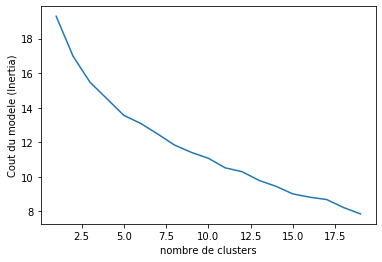

In [35]:
import matplotlib.pyplot as plt
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(toronto_grouped_clustering)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

In [36]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 4, 0, 0, 3, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [37]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

Postal Code      Borough                            Neighborhood   Latitude  \
0         M1B  Scarborough                          Malvern, Rouge  43.727929   
1         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.794200   
2         M1E  Scarborough       Guildwood, Morningside, West Hill  43.778517   
3         M1G  Scarborough                                  Woburn  43.770120   
4         M1H  Scarborough                               Cedarbrae  43.745906   

   Longitude  Cluster Labels 1st Most Common Venue      2nd Most Common Venue  \
0 -79.262029             0.0    Chinese Restaurant                Bus Station   
1 -79.262029             0.0                Lounge  Latin American Restaurant   
2 -79.346556             0.0        Clothing Store                Coffee Shop   
3 -79.408493             0.0      Ramen Restaurant             Sandwich Place   
4 -79.352188             0.0  Gym / Fitness Center       Caribbean Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Coffee Shop            Hobby Shop     Convenience Store   
1        Breakfast Spot        Clothing Store            Donut Shop   
2  Fast Food Restaurant            Restaurant            Shoe Store   
3           Coffee Shop           Pizza Place                  Café   
4   Japanese Restaurant                  Café            Comic Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0      Department Store         Women's Store    Dim Sum Restaurant   
1                 Diner        Discount Store   Distribution Center   
2   Japanese Restaurant      Toy / Game Store              Tea Room   
3             Juice Bar            Steakhouse        Ice Cream Shop   
4          Concert Hall  Ethiopian Restaurant     Electronics Store   

         9th Most Common Venue 10th Most Common Venue  
0                        Diner         Discount Store  
1                      Dog Run       Doner Restaurant  
2               Cosmetics Shop                   Bank  
3         Fast Food Restaurant  Indonesian Restaurant  
4  Eastern European Restaurant              Drugstore

Finally, let's visualize the resulting clusters

In [42]:
toronto_merged['Cluster Labels'].describe()

count    99.000000
mean      0.505051
std       1.264699
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       4.000000
Name: Cluster Labels, dtype: float64

In [43]:
toronto_merged['Cluster Labels'].isna().sum()

4

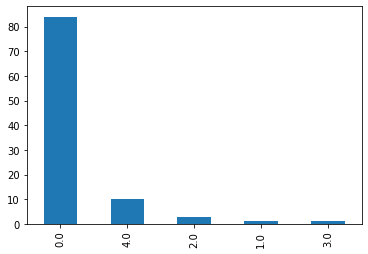

In [45]:
toronto_merged['Cluster Labels'].value_counts().plot(kind = 'bar')

#### Replace 4 NAs bys 0

In [47]:
toronto_merged['Cluster Labels'].fillna(0.0, inplace = True)

In [48]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

---
## Examine Clusters
---

#### Cluster 1

In [49]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels  1st Most Common Venue  \
0         Scarborough             0.0     Chinese Restaurant   
1         Scarborough             0.0                 Lounge   
2         Scarborough             0.0         Clothing Store   
3         Scarborough             0.0       Ramen Restaurant   
4         Scarborough             0.0   Gym / Fitness Center   
6         Scarborough             0.0            Coffee Shop   
8         Scarborough             0.0            Coffee Shop   
9         Scarborough             0.0            Coffee Shop   
10        Scarborough             0.0         Sandwich Place   
11        Scarborough             0.0         Clothing Store   
12        Scarborough             0.0                   Café   
13        Scarborough             0.0                   Café   
14        Scarborough             0.0            Coffee Shop   
15        Scarborough             0.0                  River   
16        Scarborough             0.0           Liquor Store   
17         North York             0.0                    Gym   
18         North York             0.0   Gym / Fitness Center   
19         North York             0.0      Indian Restaurant   
20         North York             0.0   Gym / Fitness Center   
21         North York             0.0            Coffee Shop   
22         North York             0.0            Coffee Shop   
23         North York             0.0                   Café   
24         North York             0.0            Pizza Place   
25         North York             0.0   Fast Food Restaurant   
26         North York             0.0            Pizza Place   
27         North York             0.0            Pizza Place   
28         North York             0.0                   Bank   
29         North York             0.0  Portuguese Restaurant   
30         North York             0.0            Coffee Shop   
31         North York             0.0            Coffee Shop   
32         North York             0.0            Coffee Shop   
33         North York             0.0            Coffee Shop   
34         North York             0.0                    Bar   
35          East York             0.0    American Restaurant   
37       East Toronto             0.0                   Café   
39          East York             0.0     Falafel Restaurant   
40          East York             0.0            Pizza Place   
41       East Toronto             0.0       Greek Restaurant   
42       East Toronto             0.0           Dessert Shop   
43       East Toronto             0.0         Clothing Store   
44    Central Toronto             0.0            Coffee Shop   
45    Central Toronto             0.0                   Café   
46    Central Toronto             0.0                   Park   
47    Central Toronto             0.0                   Park   
48    Central Toronto             0.0         Breakfast Spot   
49    Central Toronto             0.0                  Hotel   
51   Downtown Toronto             0.0                    Gym   
52   Downtown Toronto             0.0            Pizza Place   
53   Downtown Toronto             0.0    Rental Car Location   
54   Downtown Toronto             0.0                   Café   
55   Downtown Toronto             0.0   Fast Food Restaurant   
57   Downtown Toronto             0.0          Grocery Store   
59   Downtown Toronto             0.0                   Park   
60   Downtown Toronto             0.0                   Park   
62         North York             0.0            Coffee Shop   
63    Central Toronto             0.0            Coffee Shop   
64    Central Toronto             0.0        Airport Service   
66   Downtown Toronto             0.0      Convenience Store   
67   Downtown Toronto             0.0            Coffee Shop   
68   Downtown Toronto             0.0            Yoga Studio   
69   Downtown Toronto             0.0                    Gym   
71         North York             0.0         

#### Cluster 2

In [50]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
93  Etobicoke             1.0            Playground         Women's Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
93               Dog Run      Department Store          Dessert Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
93    Dim Sum Restaurant                 Diner        Discount Store   

   9th Most Common Venue 10th Most Common Venue  
93   Distribution Center       Doner Restaurant

#### Cluster 3

In [51]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
5        Scarborough             2.0        Baseball Field   
50  Downtown Toronto             2.0        Baseball Field   
70  Downtown Toronto             2.0        Baseball Field   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
5             Food Truck         Women's Store    Dim Sum Restaurant   
50      Business Service         Women's Store    Dim Sum Restaurant   
70         Women's Store    Dim Sum Restaurant                 Diner   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
5                  Diner        Discount Store   Distribution Center   
50                 Diner        Discount Store   Distribution Center   
70        Discount Store   Distribution Center               Dog Run   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
5                Dog Run      Doner Restaurant         Farmers Market  
50               Dog Run      Doner Restaurant         Farmers Market  
70      Doner Restaurant            Donut Shop   Fast Food Restaurant

#### Cluster 4

In [52]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
87  East Toronto             3.0        Sandwich Place         Women's Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
87         Deli / Bodega  Ethiopian Restaurant     Electronics Store   

          6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
87  Eastern European Restaurant             Drugstore            Donut Shop   

   9th Most Common Venue 10th Most Common Venue  
87      Doner Restaurant                Dog Run

#### Cluster 5

In [53]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
7        Scarborough             4.0                  Park   
36         East York             4.0                  Park   
38         East York             4.0     Convenience Store   
56  Downtown Toronto             4.0                  Park   
58  Downtown Toronto             4.0                  Park   
61  Downtown Toronto             4.0                  Park   
65   Central Toronto             4.0                  Park   
75  Downtown Toronto             4.0                  Park   
90         Etobicoke             4.0     Convenience Store   
96        North York             4.0                  Park   

   2nd Most Common Venue       3rd Most Common Venue 4th Most Common Venue  \
7               Bus Line                 Swim School               Dog Run   
36            Playground                     Dog Run      Department Store   
38                  Park  Construction & Landscaping      Doner Restaurant   
56         Women's Store                     Dog Run      Department Store   
58               Airport                 Snack Place           Event Space   
61            Restaurant          College Rec Center       College Stadium   
65                   Bar               Women's Store      Greek Restaurant   
75     Food & Drink Shop               Women's Store               Dog Run   
90                  Park               Women's Store          Dessert Shop   
96                 Trail                  Playground      Department Store   

   5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
7     Dim Sum Restaurant                 Diner               Discount Store   
36          Dessert Shop    Dim Sum Restaurant                        Diner   
38          Dessert Shop    Dim Sum Restaurant                        Diner   
56          Dessert Shop    Dim Sum Restaurant                        Diner   
58    Falafel Restaurant  Ethiopian Restaurant            Electronics Store   
61  Ethiopian Restaurant     Electronics Store  Eastern European Restaurant   
65          Gourmet Shop  Ethiopian Restaurant            Electronics Store   
75          Dessert Shop    Dim Sum Restaurant                        Diner   
90    Dim Sum Restaurant                 Diner               Discount Store   
96          Dessert Shop    Dim Sum Restaurant                        Diner   

          8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
7           Distribution Center      Doner Restaurant       Department Store  
36               Discount Store   Distribution Center       Doner Restaurant  
38               Discount Store   Distribution Center                Dog Run  
56               Discount Store   Distribution Center       Doner Restaurant  
58  Eastern European Restaurant             Drugstore       Department Store  
61                    Drugstore            Donut Shop       Doner Restaurant  
65  Eastern European Restaurant             Drugstore             Donut Shop  
75               Discount Store   Distribution Center       Doner Restaurant  
90          Distribution Center               Dog Run       Doner Restaurant  
96               Discount Store   Distribution Center                Dog Run